# Problema analisado #

Esse programa trás uma visualização gráfica da solução do seguinte problema: Dados os planos $y = 0$ e $y = a$ mantidos em um potencial $V = 0$ e uma região $D = \{(0,y,z), 0 < y < a\}$, mantida em um potencial $V = V_{0}$, determine $V(x,y)$ entre os planos e $D$, sabendo que essa região é livre de cargas e $V$ tende a 0 quando $x$ vai para o infinito.  

## Solução do problema: ##

$$V(x,y) = \frac{4V_{0}}{\large{\pi}}\sum\limits_{\substack{n = 1 \\ n \text{ ímpar}}}^{\infty} \frac{1}{n}\large{e}^{\large{\frac{-n\pi x}{a}}}\normalsize{\sin(\frac{n\pi y}{a})}$$

### Código: ###

Tensão máxima: V₀ = 12.0
Distância entre os planos: a = 1.0


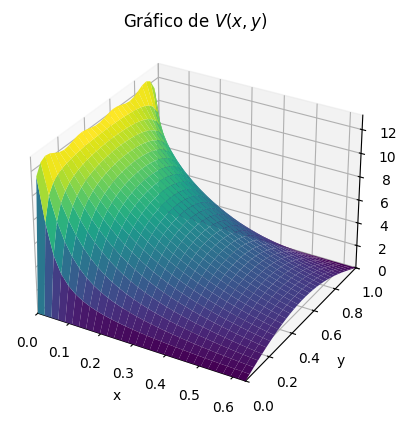

In [ ]:
#Importando as bibliotecas

import numpy as np
from matplotlib import pyplot as plt

#Definindo as constante V0 e a:

V0 = float(input("Informe o valor de V\u2080: "))
a = float(input("Informe o valor de a (distância entre os planos): "))

N = 50 #Número de somas a ser realizada pelo somatório, aumente se desejar maior precisão

#Definindo a função:

def somatorio(n,x,y):
    soma = 0
    for i in range(1,n+1,2): #somando apenas os termos impares
        exponencial = np.exp(-i * np.pi * x / a)
        seno = np.sin(i * np.pi * y / a)
        soma += exponencial * seno / i
    return soma

def V(x,y):
    return 4 * V0 * somatorio(N,x,y) / np.pi

#Definindo os intervalos de x e y

x = np.linspace(0, 2*a/np.pi, 30)
y = np.linspace(0, a, 30)

#Criando o espaço onde o gráfico será plotado

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d') #figura criada

ax.set_xlabel('x') #Definindo os eixos e os limites da figura
ax.set_ylabel('y')

ax.set_xlim(0, 2*a/np.pi)
ax.set_ylim(0, a) #Caso *: se você definir o limite inferior menor que 0 ou o superior maior que a, então você também estara analisando o comportamento de V para além dos planos y = 0 e y = a. Sinta-se livre para fazer essa alteração se desejar, mas lembre-se que alterar os limites no linspace de y também
ax.set_zlim(0, 1.1*V0) #Se estiver no Caso *, mude o limite inferior para algo negativo, faça o ajuste necessário para ter a melhor visualização do gráfico


#Plotando o gráfico

X, Y = np.meshgrid(x, y) #Criando a grade de pontos
v = V(X, Y) #Calculando V para cada ponto da grade criada

ax.plot_surface(X, Y, v, rstride=1, cstride=1, cmap='viridis', edgecolor='none')

print(f'Tensão máxima: V\u2080 = {V0}')
print(f'Distância entre os planos: a = {a}')

plt.title(r'Gráfico de $V(x,y)$')

plt.show()

### Visualização das superfícies equipotenciais: ###

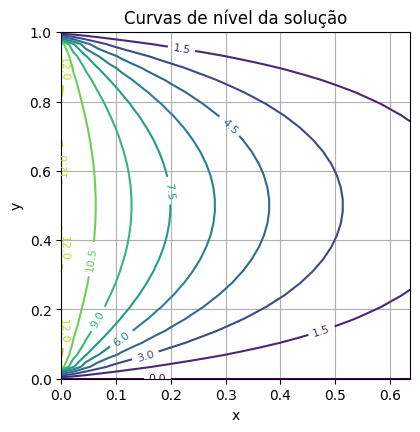

In [ ]:
plt.figure(figsize=(4.5, 4.5))
contours = plt.contour(X, Y, v, 10, cmap='viridis')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.clabel(contours, inline=True, fontsize=8)
plt.title('Curvas de nível da solução')
plt.show()